In [2]:
# --- 1. Import libraries ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# --- 2. Load dataset ---
df = pd.read_csv("Spotify Most Streamed Songs.csv")

In [5]:
# --- 3. Clean dataset ---
# Remove commas and convert to numeric
numeric_cols = [
    'streams', 'in_spotify_playlists', 'in_spotify_charts',
    'in_apple_playlists', 'in_apple_charts',
    'in_deezer_playlists', 'in_deezer_charts',
    'in_shazam_charts'
]

for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '')
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop unused column
if 'cover_url' in df.columns:
    df.drop(columns='cover_url', inplace=True)

# Fill missing values
df['key'] = df['key'].fillna(df['key'].mode()[0])
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0)

df.dropna(subset=['streams'], inplace=True)

In [6]:
# --- 4. Basic Info ---
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

Shape: (952, 24)

Missing Values:
 track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

Data Types:
 track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        

In [7]:
# --- 5. Descriptive Statistics ---
print("\nSummary:\n", df.describe())


Summary:
        artist_count  released_year  released_month  released_day  \
count    952.000000     952.000000      952.000000    952.000000   
mean       1.556723    2018.288866        6.038866     13.944328   
std        0.893331      11.011397        3.564571      9.197223   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            952.000000         952.000000  9.520000e+02   
mean            5202.565126          12.022059  5.141374e+08   
std             7901.400683          19.582405  5.668569e+08   
min               31.000000           0.000000  2.762000e+03   
25%              874.500000           0.000000  1.416362

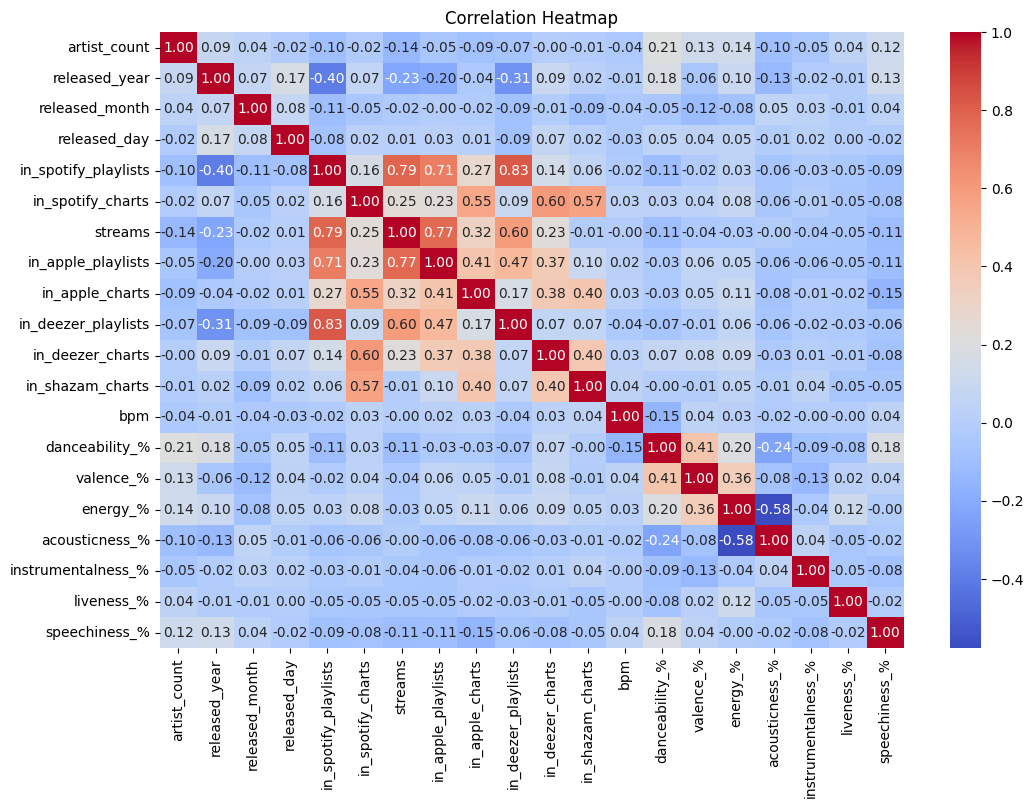

In [8]:
# --- 6. Correlation Heatmap ---
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-9-2e635a66cd1d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_songs, x='streams', y='track_name', palette='viridis')


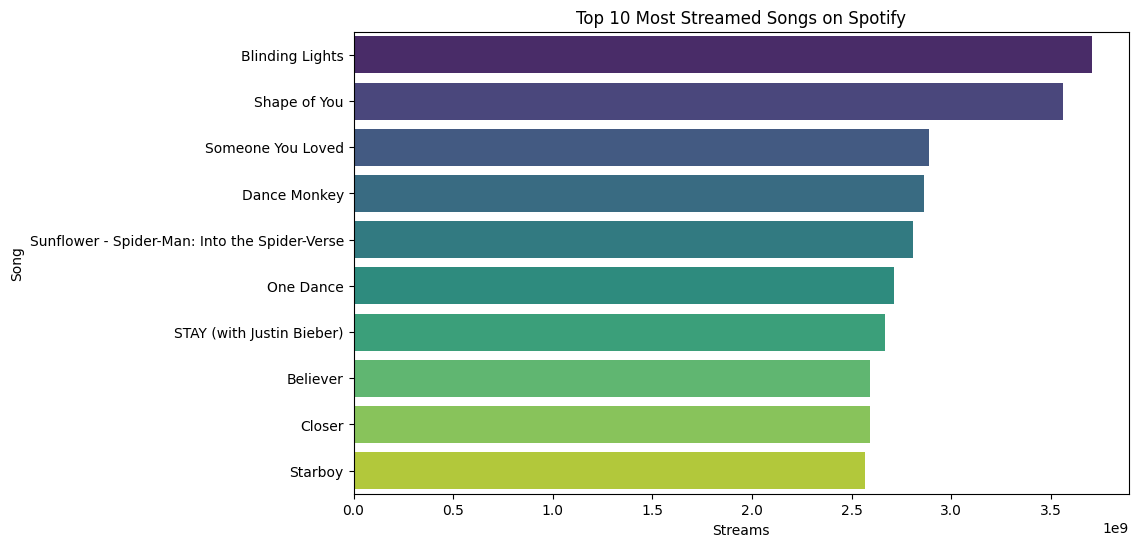

In [9]:
# --- 7. Top 10 Streamed Songs ---
top_songs = df.sort_values(by='streams', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_songs, x='streams', y='track_name', palette='viridis')
plt.title("Top 10 Most Streamed Songs on Spotify")
plt.xlabel("Streams")
plt.ylabel("Song")
plt.show()

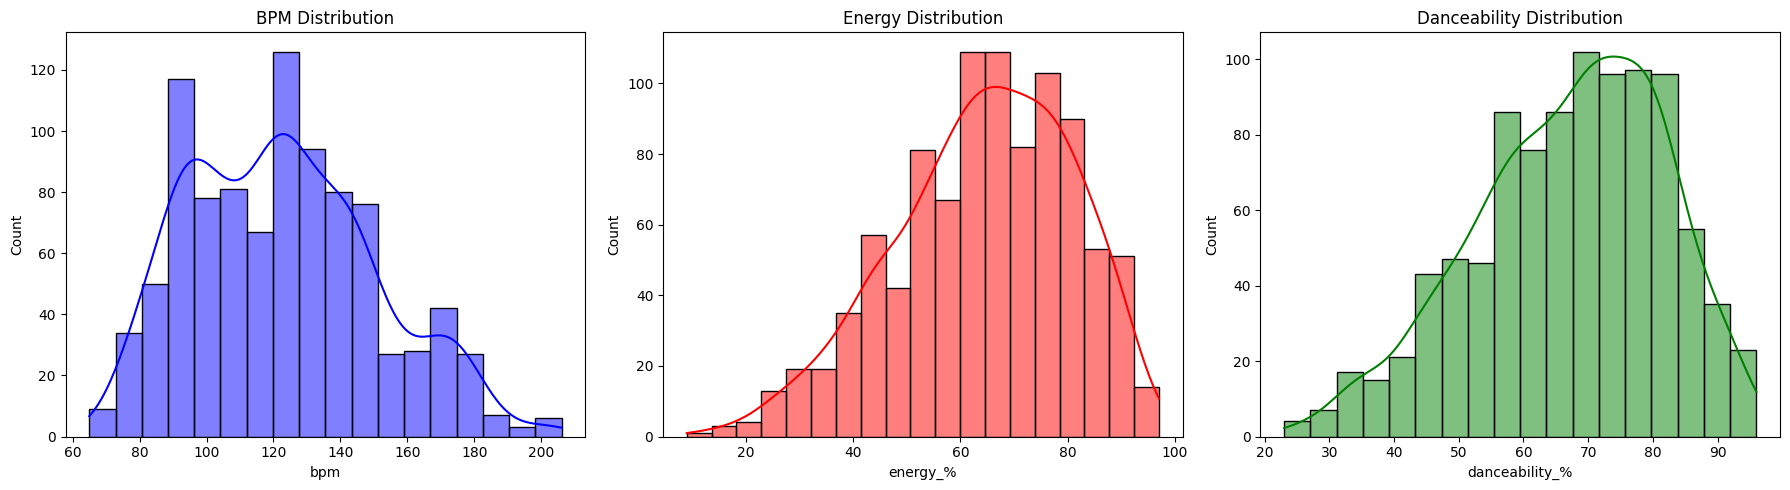

In [10]:
# --- 8. Distribution of BPM, Energy, Danceability ---
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['bpm'], kde=True, ax=axs[0], color='blue')
axs[0].set_title("BPM Distribution")

sns.histplot(df['energy_%'], kde=True, ax=axs[1], color='red')
axs[1].set_title("Energy Distribution")

sns.histplot(df['danceability_%'], kde=True, ax=axs[2], color='green')
axs[2].set_title("Danceability Distribution")
plt.tight_layout()
plt.show()

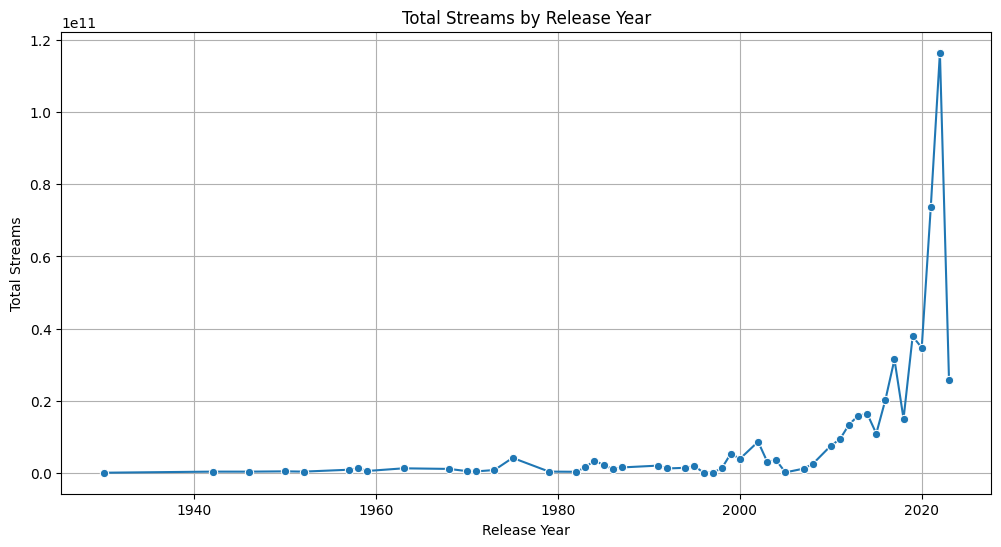

In [11]:
# --- 9. Trends by Year ---
yearly = df.groupby('released_year')['streams'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly, x='released_year', y='streams', marker='o')
plt.title("Total Streams by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Total Streams")
plt.grid(True)
plt.show()